## Creator

- **Name**: heisdanielade
- **Tools Used**: Python, Pandas, Matplotlib, Seaborn
- **Project Type**: Health-related Data Analysis
- **Date**: 28th April, 2025

## Presentation of the Dataset

- **Data Source**: Kaggle Community Health Evaluation Dataset  https://www.kaggle.com/datasets/ziya07/community-health-evaluation-dataset

- **Overview**: The Community Health Evaluation Dataset comprises of synthesized data aimed at evaluating community health services and health quality based on biomechanical time series. This dataset contains 347 records, each representing a unique participant with various demographic, health service utilization and biomechanical measures.

- **Quantitative Variables Used for Analysis**:
  - **Age** (Ratio scale) — Age of the participant, measured in years (integer).
  - **Quality of Life Score** (Interval scale) — A measure of the participant's quality of life, measured on a point scale between 50 and 100 (integer).

- **Categorical/Qualitative Variables**:
  - **Gender** (Nominal scale) — Gender of the participant (categorical: 'M' for male, 'F' for female).
  - **Service Type** (Nominal scale) — Service offered to participant (categorical: Rehab, Preventive, Consultation).


In [60]:
# Libraries Used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Load dataset
df = pd.read_csv("../data/community_health_dataset.csv")

In [62]:
# First 5 rows of the dataset
df.head()

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


## Variables

- **Participant ID**: Unique identifier (integer, **categorical**, **nominal**).
- **Age**: Participant’s age (integer, **quantitative**, **ratio**).
- **Gender**: Participant’s gender ('M' for male, 'F' for female) (categorical, **nominal**).
- **SES (Socioeconomic Status)**: Socioeconomic status on a scale from 1 to 4 (integer, **categorical**, **ordinal**).
- **Service Type**: Type of health service accessed ('Rehab', 'Preventive', 'Consultation') (categorical, **nominal**).
- **Visit Frequency**: Frequency of visits ('Weekly', 'Monthly', 'Yearly') (categorical, **ordinal**).
- **Step Frequency (steps/min)**: Average steps per minute (integer, **quantitative**, **ratio**).
- **Stride Length (m)**: Average stride length in meters (float, **quantitative**, **ratio**).
- **Joint Angle (°)**: Average joint angle in degrees (float, **quantitative**, **ratio**).
- **EMG Activity**: Muscle activity level ('Low', 'Moderate', 'High') (categorical, **ordinal**).
- **Patient Satisfaction (1-10)**: Satisfaction score from 1 to 10 (integer, **quantitative**, **ordinal**).
- **Quality of Life Score**: Quality of life score (integer, **quantitative**, **ordinal**).


In [64]:
# Summary statistics
df.describe()

,Participant ID,Age,SES,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),Patient Satisfaction (1-10),Quality of Life Score
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,174.000000,43.374640,2.357349,80.123919,0.751499,20.057378,5.213256,74.195965
std,100.314505,15.177304,1.129848,11.257582,0.143221,5.807653,2.833643,13.949400
min,1.000000,18.000000,1.000000,60.000000,0.500000,10.060000,1.000000,50.000000
25%,87.500000,31.000000,1.000000,71.000000,0.620000,15.065000,3.000000,62.000000
50%,174.000000,43.000000,2.000000,81.000000,0.760000,20.190000,5.000000,74.000000
75%,260.500000,56.000000,3.000000,90.000000,0.860000,25.220000,8.000000,86.000000
max,347.000000,69.000000,4.000000,99.000000,1.000000,29.970000,10.000000,99.000000


In [65]:
# ================ Organization and Visualizations ================
# Histograms for Quantitative Variables

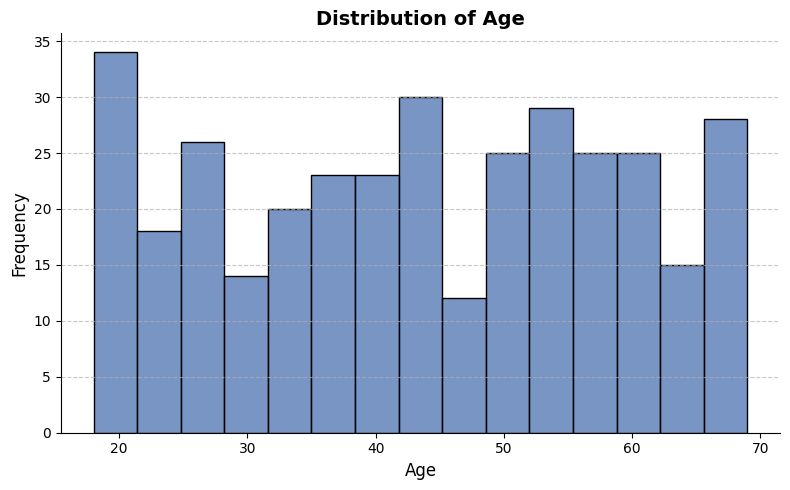

In [66]:
# Age Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Age',
    color='#4C72B0',
    bins=15,
    edgecolor='black'
)
plt.title('Distribution of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


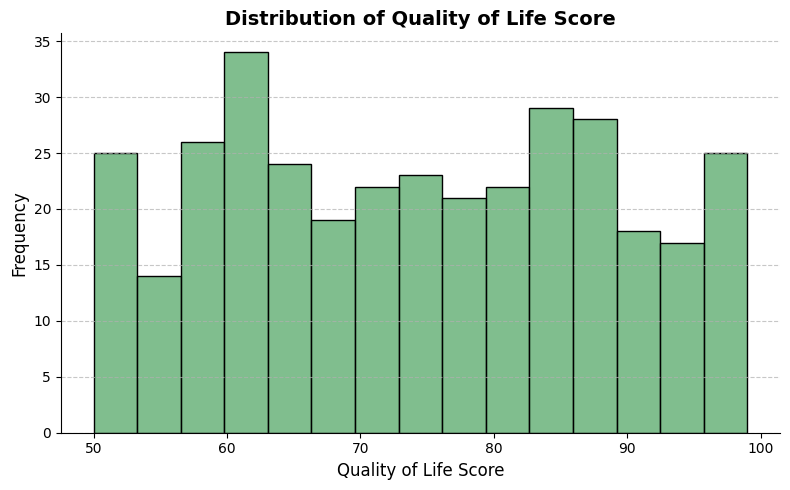

In [67]:
# Quality of Life Score Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Quality of Life Score',
    color='#55A868',
    bins=15,
    edgecolor='black'
)
plt.title('Distribution of Quality of Life Score', fontsize=14, fontweight='bold')
plt.xlabel('Quality of Life Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


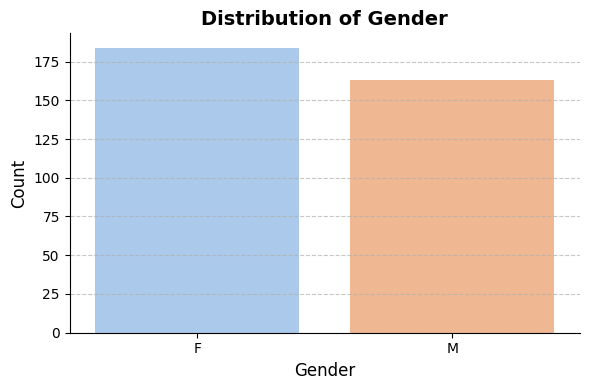

In [68]:
# Gender Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(
    x='Gender',
    hue='Gender',
    data=df,
    palette='pastel',
    legend=False
)
plt.title('Distribution of Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

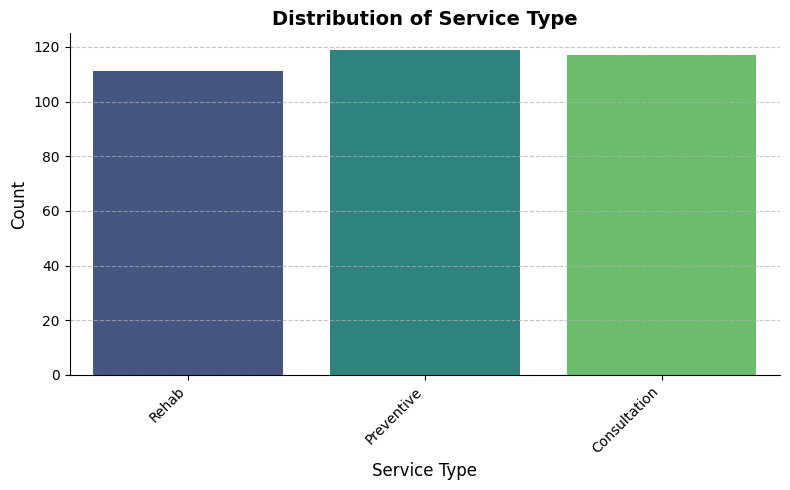

In [69]:
# Service Type Bar Chart
plt.figure(figsize=(8,5))
sns.countplot(
    x='Service Type',
    hue='Service Type',
    data=df,
    palette='viridis',
    legend=False
)
plt.title('Distribution of Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


In [70]:
# ================ Descriptive Statistics ================

In [71]:
# IQR = Q3 - Q1
Q1 = df[['Age', 'Quality of Life Score']].quantile(0.25)
Q3 = df[['Age', 'Quality of Life Score']].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):")
print(IQR)


Interquartile Range (IQR):
Age                      25.0
Quality of Life Score    24.0
dtype: float64


In [72]:
Quartile_Deviation = IQR / 2

print("\nQuartile Deviation:")
print(Quartile_Deviation)



Quartile Deviation:
Age                      12.5
Quality of Life Score    12.0
dtype: float64


In [73]:
CV = (df[['Age', 'Quality of Life Score']].std() / df[['Age', 'Quality of Life Score']].mean()) * 100

print("\nCoefficient of Variation (%):")
print(CV)



Coefficient of Variation (%):
Age                      34.991194
Quality of Life Score    18.800753
dtype: float64


## Statistical Measures

### Interquartile Range (IQR)
- **Age:** 25.0
- **Quality of Life Score:** 24.0

The IQR measures the spread of the middle 50% of the data. Both variables show moderate dispersion, with Age having a slightly higher variability.

---

### Quartile Deviation (Semi-Interquartile Range)
- **Age:** 12.5
- **Quality of Life Score:** 12.0

The quartile deviation, being half the IQR, further confirms the moderate spread around the median for both variables.

---

### Coefficient of Variation (CV)
- **Age:** 34.99%
- **Quality of Life Score:** 18.80%

The coefficient of variation shows that **Age** is relatively more dispersed compared to the **Quality of Life Score**.  
A lower CV for the Quality of Life Score suggests the ratings are more consistent among participants.



In [74]:
# List of quantitative columns
quantitative_vars = ['Age', 'Quality of Life Score']
stats_summary = pd.DataFrame(index=[
    'Mean',
    'Median',
    'Mode',
    'Standard Deviation',
    'Variance',
    'Range',
    'Skewness',
    'Kurtosis'
])

for var in quantitative_vars:
    stats_summary[var] = [
        df[var].mean(),
        df[var].median(),
        df[var].mode()[0],
        df[var].std(),
        df[var].var(),
        df[var].max() - df[var].min(),
        df[var].skew(),
        df[var].kurtosis()
    ]

stats_summary = stats_summary.round(2)
print(stats_summary)


                       Age  Quality of Life Score
Mean                 43.37                  74.20
Median               43.00                  74.00
Mode                 41.00                  62.00
Standard Deviation   15.18                  13.95
Variance            230.35                 194.59
Range                51.00                  49.00
Skewness             -0.04                   0.02
Kurtosis             -1.16                  -1.16


## Interpretation of Analysis of Quantitative Variables

### Age
- **Average age (Mean)** is **43.37**, close to the **median** of **43**, indicating a balanced age distribution. The **mode** of **41** suggests a slight tendency toward younger participants.

- The age distribution is **symmetrical**, with a **standard deviation** of **15.18**, indicating a moderate spread. The range of 51 years covers a wide age spectrum.

- The **skewness** of **-0.04** and **kurtosis** of **-1.16** indicate a nearly symmetrical distribution with fewer extreme outliers.

### Quality of Life Score
- The **mean score** of **74.20** indicates a generally high quality of life, with the **median** and **mode** suggesting a slight left-skew.

- The **standard deviation** of **13.95** and **range** of **49** reflect significant variability in quality of life, highlighting its subjectivity.

- The **skewness** of **0.02** and **kurtosis** of **-1.16** suggest a near-symmetrical distribution with a moderate concentration of scores around the center.

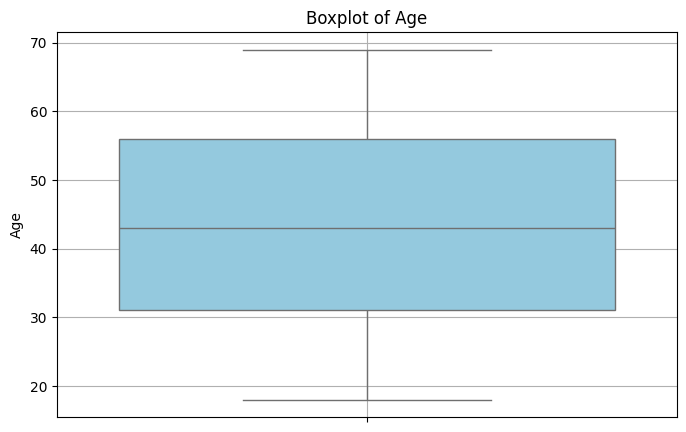

In [75]:
# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.grid(True)
plt.show()

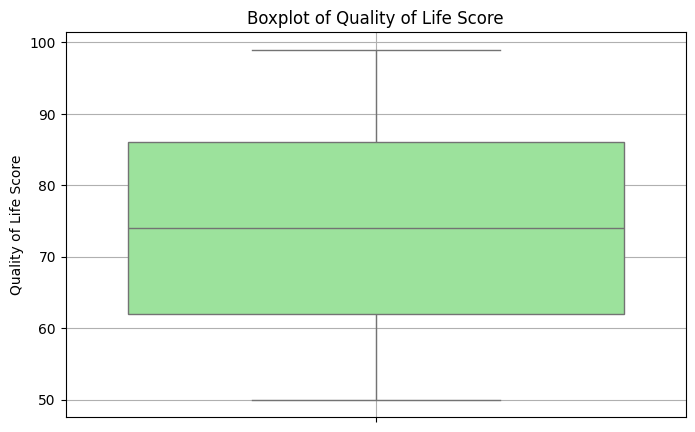

In [76]:
# Boxplot for Quality of Life Score
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Quality of Life Score'], color='lightgreen')
plt.title('Boxplot of Quality of Life Score')
plt.grid(True)
plt.show()

In [77]:
# Gender Frequency Count
gender_counts = df['Gender'].value_counts()

# Service Type Frequency Count
service_type_counts = df['Service Type'].value_counts()

# Mode for Gender
gender_mode = gender_counts.idxmax()

# Mode for Service Type
service_type_mode = service_type_counts.idxmax()

print("\nGender Frequency Count:")
print(gender_counts)

print("\nService Type Frequency Count:")
print(service_type_counts)

print(f"\nMode of Gender: {gender_mode}")
print(f"\nMode of Service Type: {service_type_mode}")


Gender Frequency Count:
Gender
F    184
M    163
Name: count, dtype: int64

Service Type Frequency Count:
Service Type
Preventive      119
Consultation    117
Rehab           111
Name: count, dtype: int64

Mode of Gender: F

Mode of Service Type: Preventive


## Interpretation of Analysis of Qualitative Variables

### Gender
- The **Gender** variable shows the following distribution:
  - **Female (F): 184**
  - **Male (M): 163**
- The sample is fairly balanced, with a slight majority of **females** in the dataset. 
- The distribution is relatively equal, but there is still a **higher representation of females** compared to males.
- This near balance suggests that gender should not introduce significant bias in the analysis related to gender-specific trends or characteristics.

### Service Type
- The **Service Type** variable shows the following distribution:
  - **Preventive**: 119 participants
  - **Consultation**: 117 participants
  - **Rehab**: 111 participants
- The **Preventive** service type has a slight majority, but all three service types are fairly balanced in terms of the number of participants.
- The distribution indicates that the data includes a diverse representation of service types, which might suggest varied participant needs and experiences.
- It would be interesting to see if the **service type** correlates with differences in **quality of life scores**, as access to different types of services could have an impact on overall well-being.


In [78]:
# Group Quality of Life Score by Gender
gender_grouped_qol = df.groupby('Gender')['Quality of Life Score']

# Calculate descriptive statistics per gender
gender_qol_stats = gender_grouped_qol.describe()

print(gender_qol_stats)


        count       mean        std   min    25%   50%    75%   max
Gender                                                             
F       184.0  74.239130  13.683279  50.0  62.75  74.0  85.25  99.0
M       163.0  74.147239  14.285983  50.0  62.00  73.0  86.00  99.0


In [79]:
# IQR (Interquartile Range) for each gender group
iqr_by_gender = gender_grouped_qol.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Quartile Deviation (half of IQR)
qd_by_gender = iqr_by_gender / 2

# Coefficient of Variation (CV) for each gender group
cv_by_gender = gender_grouped_qol.apply(lambda x: (x.std() / x.mean()) * 100)

# Display the results
print("IQR by Gender:")
print(iqr_by_gender)

print("\nQuartile Deviation by Gender:")
print(qd_by_gender)

print("\nCoefficient of Variation by Gender:")
print(cv_by_gender)


IQR by Gender:
Gender
F    22.5
M    24.0
Name: Quality of Life Score, dtype: float64

Quartile Deviation by Gender:
Gender
F    11.25
M    12.00
Name: Quality of Life Score, dtype: float64

Coefficient of Variation by Gender:
Gender
F    18.431357
M    19.267046
Name: Quality of Life Score, dtype: float64


## Conclusion

From the analysis of the **Age** and **Quality of Life Score** variables, we can draw several key conclusions:

1. **Age Distribution**:
   - The **mean age** is **43.37**, with a **median of 43** and **mode of 41**, indicating a middle-aged group with a slight concentration around 41.
   - A **range of 51 years** and **symmetric distribution** suggest diversity in age, providing a solid basis for age-related analysis.

2. **Quality of Life Score Distribution**:
   - The **mean score of 74.20** indicates moderate to high quality of life, but the **mode of 62** suggests a segment with lower scores, pointing to varying perceptions of well-being.
   - A **wide range of 49 points** and **standard deviation of 13.95** show significant variability in quality of life among participants.

3. **Implications**:
   - The **age distribution** includes both younger and older participants, enabling age-related subgroup analysis.
   - The **quality of life** variability suggests diverse health perceptions, potentially linked to demographic, socioeconomic, or health factors.
   - **Gender** and **Service Type** show balanced distributions, with **Gender** having a slight female majority and Service Type equally spread across **Preventive, Consultation, and Rehab**.

Overall, the dataset offers a comprehensive view of age and quality of life, allowing for more in-depth analysis into how these variables might correlate with other factors in the dataset.